In [3]:
%matplotlib inline
import numpy as np
import pandas as pd
import pylab as pl
from matplotlib import pyplot as plt
import seaborn as sns; sns.set()
from tabulate import tabulate

In [4]:
# Función para visualizar un conjunto de datos en 2D
def plot_data(X, y, size=None):
    y_unique = np.unique(y)
    colors = pl.cm.rainbow(np.linspace(0.0, 1.0, y_unique.size))
    for this_y, color in zip(y_unique, colors):
        this_X = X[y == this_y]
        pl.scatter(this_X[:, 0], this_X[:, 1],  c=color,
                    alpha=0.5, edgecolor='k', s=size,
                    label="Class %s" % this_y)
    pl.legend(loc="best")
    pl.title("Data")
    
# Función para visualizar de la superficie de decisión de un clasificador
def plot_decision_region(X, pred_fun):
    min_x = np.min(X[:, 0])
    max_x = np.max(X[:, 0])
    min_y = np.min(X[:, 1])
    max_y = np.max(X[:, 1])
    min_x = min_x - (max_x - min_x) * 0.05
    max_x = max_x + (max_x - min_x) * 0.05
    min_y = min_y - (max_y - min_y) * 0.05
    max_y = max_y + (max_y - min_y) * 0.05
    x_vals = np.linspace(min_x, max_x, 100)
    y_vals = np.linspace(min_y, max_y, 100)
    XX, YY = np.meshgrid(x_vals, y_vals)
    grid_r, grid_c = XX.shape
    ZZ = np.zeros((grid_r, grid_c))
    for i in range(grid_r):
        for j in range(grid_c):
            ZZ[i, j] = pred_fun(XX[i, j], YY[i, j])
    pl.contourf(XX, YY, ZZ, 100, cmap = pl.cm.coolwarm, vmin= -1, vmax=2)
    pl.colorbar()
    pl.xlabel("x")
    pl.ylabel("y")
    
def gen_pred_fun(clf):
    def pred_fun(x1, x2):
        x = np.array([[x1, x2]])
        return clf.predict(x)[0]
    return pred_fun

In [5]:
data_ori = pd.read_csv('/Users/alexander/Documents/Inteligentes/proyecto final/Selfie-dataset/selfie_dataset.txt', sep=" ", header=None)
data_ori.columns=['image_name','popularity_score','partial_faces','is_female','baby','child','teenager','youth','middle_age','senior','white','black','asian','oval_face','round_face','heart_face','smiling','mouth_open','frowning','wearing_glasses','wearing_sunglasses','wearing_lipstick','tongue_out','duck_face','black_hair','blond_hair','brown_hair','red_hair','curly_hair','straight_hair','braid_hair','showing_cellphone','using_earphone','using_mirror','braces','wearing_hat','harsh_lighting','dim_lighting']
data_ori


,image_name,popularity_score,partial_faces,is_female,baby,child,teenager,youth,middle_age,senior,...,curly_hair,straight_hair,braid_hair,showing_cellphone,using_earphone,using_mirror,braces,wearing_hat,harsh_lighting,dim_lighting
0,00a454da495e11e28a7322000a1fa414_6,3.901,1,1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
1,00cddb96ac4c11e3a30212279ba1b65f_6,4.385,1,1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
2,01cdd7aa1a1a11e2aaa822000a1fb0dd_6,4.243,-1,1,-1,-1,1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
3,024696bead0c11e389d50ec42b3b1b1c_6,4.169,-1,-1,-1,-1,1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
4,026df048221a11e2b52122000a1fa4b5_6,3.873,-1,1,-1,-1,-1,-1,1,-1,...,-1,1,-1,-1,-1,-1,-1,-1,-1,-1
5,02b511eed26911e2851d22000a1fb71f_6,4.458,1,1,-1,-1,1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
6,02ee8060b02f11e38fe012b1c8928cc9_6,4.679,-1,1,-1,-1,1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
7,0303318e48cc11e2970f22000a1fbcc2_6,4.042,-1,1,-1,-1,-1,1,-1,-1,...,-1,1,-1,1,-1,1,-1,-1,-1,-1
8,032a49b6bffb11e3b9ca0002c9dbcd18_6,3.760,-1,1,-1,-1,1,-1,-1,-1,...,-1,-1,-1,1,-1,1,-1,-1,-1,-1
9,0345a4babff911e395860002c954a07e_6,3.302,-1,1,-1,-1,1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


In [ ]:
g = sns.pairplot(data_ori)

In [4]:
columnsNamesArr = data_ori.columns.values
print(columnsNamesArr)


['image_name' 'popularity_score' 'partial_faces' 'is_female' 'baby'
 'child' 'teenager' 'youth' 'middle_age' 'senior' 'white' 'black' 'asian'
 'oval_face' 'round_face' 'heart_face' 'smiling' 'mouth_open' 'frowning'
 'wearing_glasses' 'wearing_sunglasses' 'wearing_lipstick' 'tongue_out'
 'duck_face' 'black_hair' 'blond_hair' 'brown_hair' 'red_hair'
 'curly_hair' 'straight_hair' 'braid_hair' 'showing_cellphone'
 'using_earphone' 'using_mirror' 'braces' 'wearing_hat' 'harsh_lighting'
 'dim_lighting']


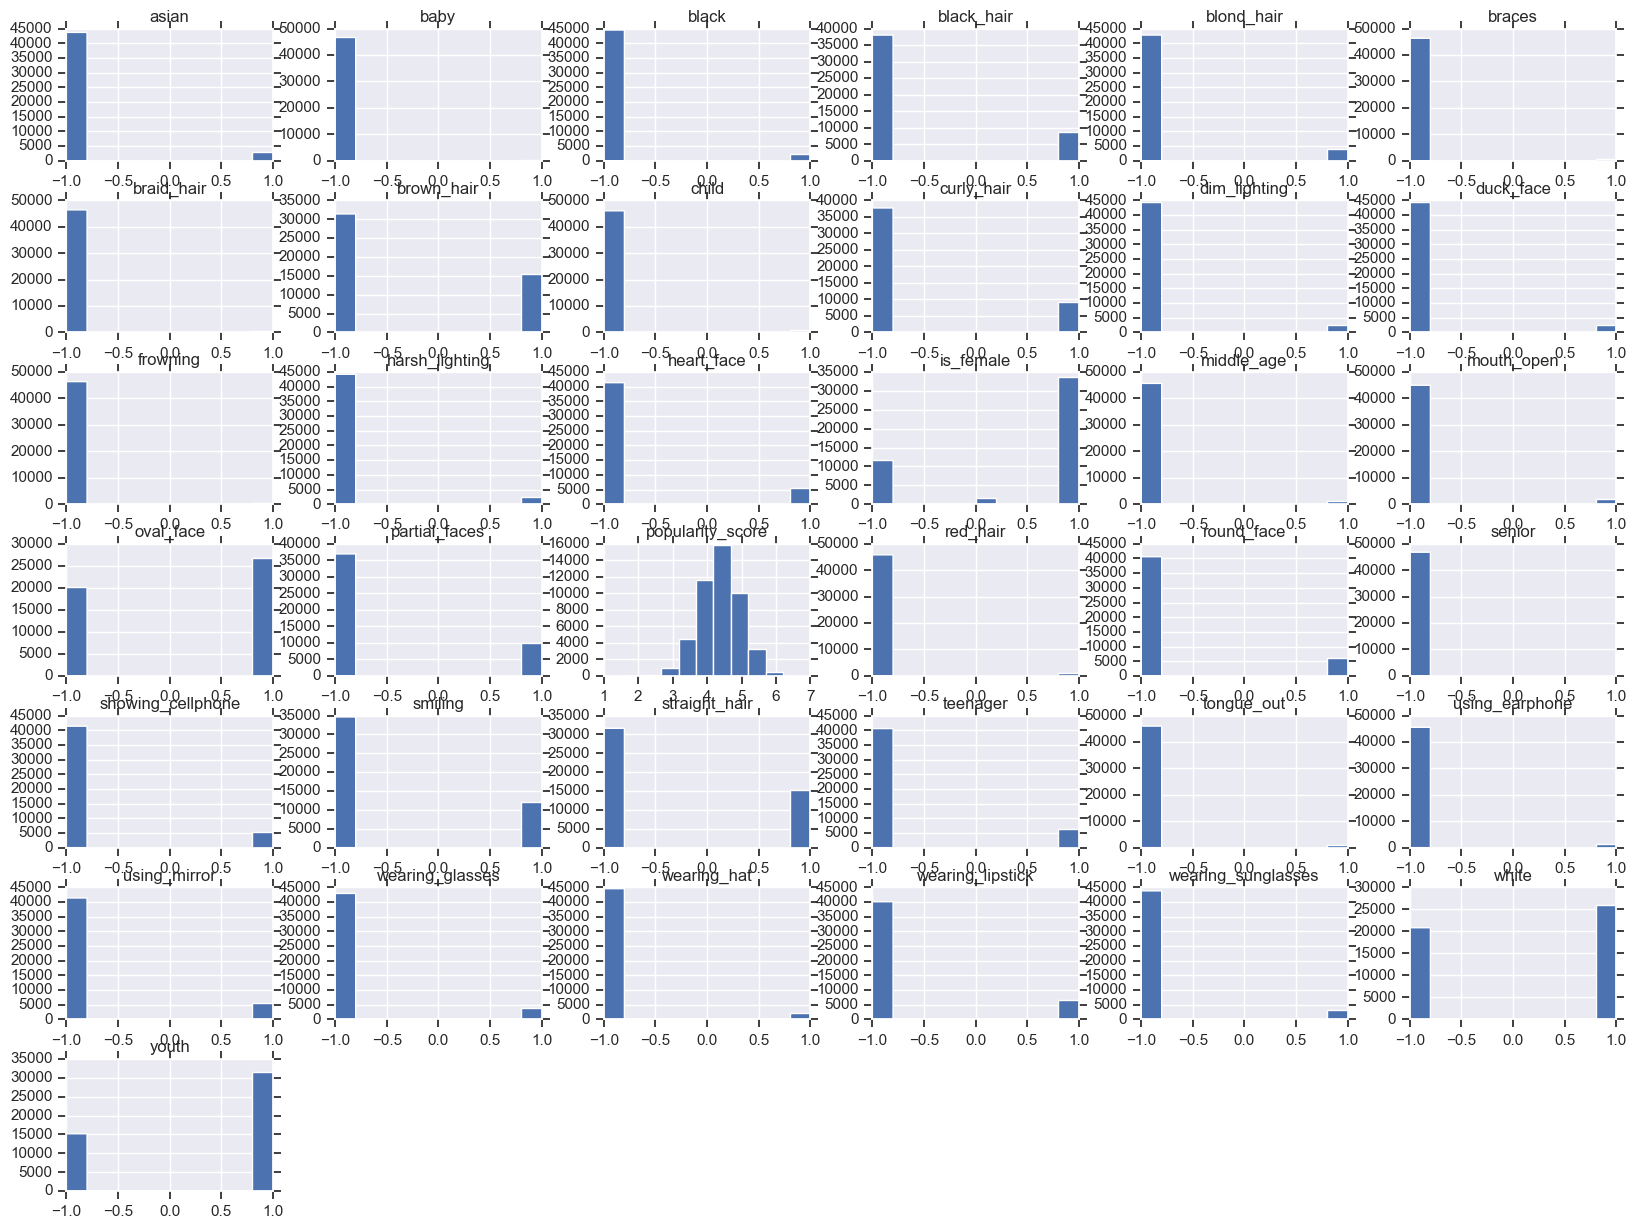

In [5]:
hist = data_ori.hist(figsize=(20, 15))

In [32]:
import glob
x= glob.glob('/Users/alexander/Documents/Inteligentes/proyecto final/Selfie-dataset/images/10245*.jpg')
print(len(x))

x_sort=x
x_sort.sort()
x_sort=x_sort[:600]

ee='/Users/alexander/Documents/Inteligentes/proyecto final/Selfie-dataset/images/'
#print(len(ee))
    
import shutil, os
os.mkdir('/Users/alexander/Documents/Inteligentes/proyecto final/Selfie-dataset/images_muestra2')
for f in x_sort:
    shutil.copy(f, '/Users/alexander/Documents/Inteligentes/proyecto final/Selfie-dataset/images_muestra2')   
    
namefile=[]
for q in x_sort:
    temp=q[77:]
    namefile.append(temp)
#print(namefile)

namefile_full={q2.replace('.jpg','') for q2 in namefile}
#print(namefile_full)
data = [] 
with open('/Users/alexander/Documents/Inteligentes/proyecto final/Selfie-dataset/selfie_dataset.txt','r') as file:
    lines = file.read().split("\n")
    for line in lines: 
        for xprime in namefile_full:
            if xprime in line:
                data.append(line)

with open("/Users/alexander/Documents/Inteligentes/proyecto final/Selfie-dataset/selfie_dataset_muestra2.txt", "w") as file:
    for elem in data:
        file.write(elem+"\n")
    file.close()    
        

1252


In [10]:
data_rec = pd.read_csv('/Users/alexander/Documents/Inteligentes/proyecto final/Selfie-dataset/selfie_dataset_muestra.txt', sep=" ", header=None)
data_rec.columns=['image_name','popularity_score','partial_faces','is_female','baby','child','teenager','youth','middle_age','senior','white','black','asian','oval_face','round_face','heart_face','smiling','mouth_open','frowning','wearing_glasses','wearing_sunglasses','wearing_lipstick','tongue_out','duck_face','black_hair','blond_hair','brown_hair','red_hair','curly_hair','straight_hair','braid_hair','showing_cellphone','using_earphone','using_mirror','braces','wearing_hat','harsh_lighting','dim_lighting']
data_rec

,image_name,popularity_score,partial_faces,is_female,baby,child,teenager,youth,middle_age,senior,...,curly_hair,straight_hair,braid_hair,showing_cellphone,using_earphone,using_mirror,braces,wearing_hat,harsh_lighting,dim_lighting
0,10245902_1378728819075144_364358189_a,4.169,-1,-1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,1,-1,-1
1,10245902_1411617289106153_1993470830_a,3.937,-1,1,-1,-1,1,-1,-1,-1,...,1,-1,-1,1,-1,1,-1,-1,-1,-1
2,10245902_1423156934608160_1479980385_a,4.690,-1,1,-1,-1,1,-1,-1,-1,...,-1,1,-1,1,-1,1,-1,-1,-1,-1
3,10245902_1438575916383981_690997602_a,4.301,-1,1,-1,-1,1,-1,-1,-1,...,-1,1,-1,-1,-1,-1,-1,-1,1,1
4,10245902_230323057158098_249204062_a,4.314,1,-1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
5,10245902_280911868737703_1399193390_a,4.308,-1,-1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,1,-1,-1
6,10245902_283811405117867_1595384071_a,4.890,-1,1,-1,-1,-1,1,-1,-1,...,-1,1,-1,-1,-1,-1,-1,-1,-1,-1
7,10245902_287524564743561_1299688584_a,3.373,-1,1,-1,-1,1,-1,-1,-1,...,-1,1,-1,1,-1,1,-1,-1,-1,-1
8,10245902_373999322741424_102694820_a,4.193,-1,1,-1,-1,1,-1,-1,-1,...,-1,1,-1,-1,-1,-1,-1,-1,-1,-1
9,10245902_533626620085222_1493203325_a,4.700,1,1,-1,-1,-1,1,-1,-1,...,1,-1,-1,-1,-1,-1,-1,-1,-1,-1


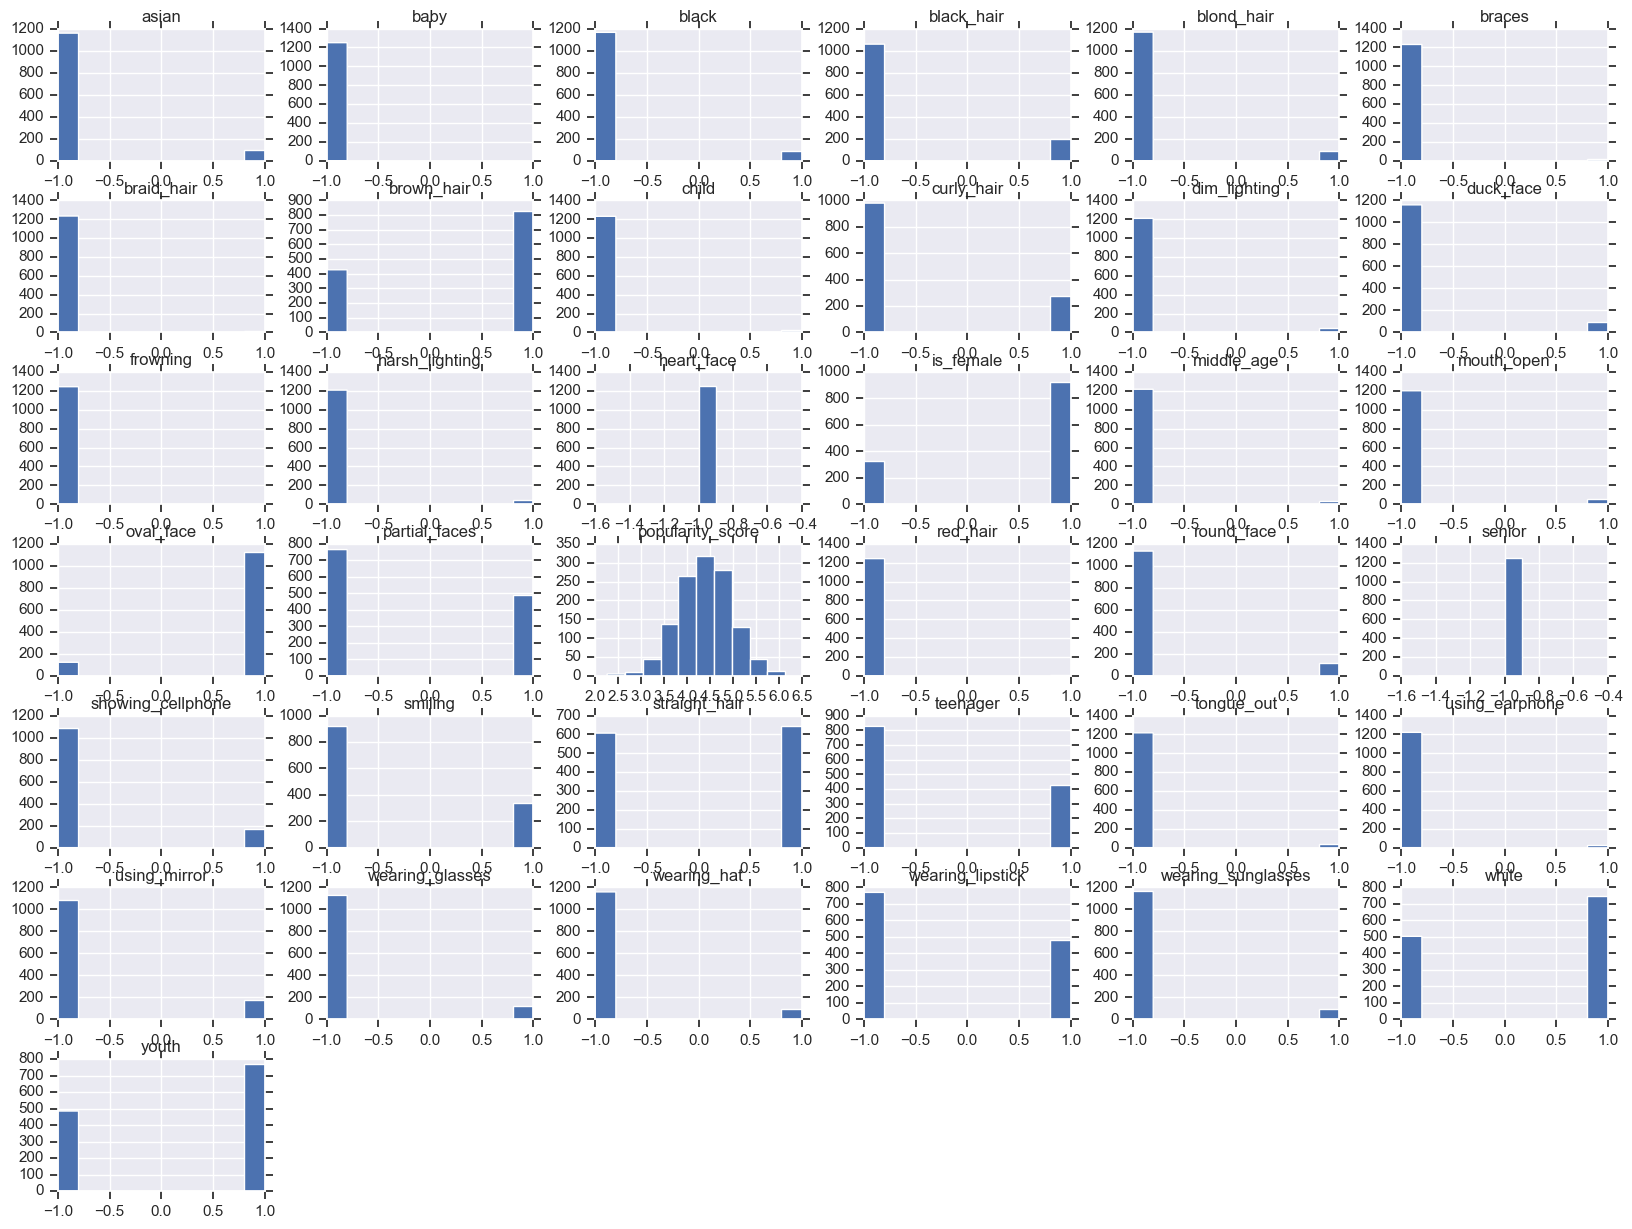

In [11]:
hist = data_rec.hist(figsize=(20, 15))

In [21]:
from PIL import Image
from numpy import asarray
from os import listdir
from matplotlib import image
loaded_images = list()
for filename in x:
# load image
    img_data = image.imread(filename)
# store loaded image
    loaded_images.append(img_data)
    print('> loaded %s %s' % (filename, img_data.shape))

> loaded /Users/alexander/Documents/Inteligentes/proyecto final/Selfie-dataset/images/10245902_1378728819075144_364358189_a.jpg (306, 306, 3)
> loaded /Users/alexander/Documents/Inteligentes/proyecto final/Selfie-dataset/images/10245902_1411617289106153_1993470830_a.jpg (306, 306, 3)
> loaded /Users/alexander/Documents/Inteligentes/proyecto final/Selfie-dataset/images/10245902_1423156934608160_1479980385_a.jpg (306, 306, 3)
> loaded /Users/alexander/Documents/Inteligentes/proyecto final/Selfie-dataset/images/10245902_1438575916383981_690997602_a.jpg (306, 306, 3)
> loaded /Users/alexander/Documents/Inteligentes/proyecto final/Selfie-dataset/images/10245902_230323057158098_249204062_a.jpg (306, 306, 3)
> loaded /Users/alexander/Documents/Inteligentes/proyecto final/Selfie-dataset/images/10245902_280911868737703_1399193390_a.jpg (306, 306, 3)
> loaded /Users/alexander/Documents/Inteligentes/proyecto final/Selfie-dataset/images/10245902_283811405117867_1595384071_a.jpg (306, 306, 3)
> loa

> loaded /Users/alexander/Documents/Inteligentes/proyecto final/Selfie-dataset/images/10245907_586184368145346_1980825460_a.jpg (306, 306, 3)
> loaded /Users/alexander/Documents/Inteligentes/proyecto final/Selfie-dataset/images/10245907_638290432913787_1192042578_a.jpg (306, 306, 3)
> loaded /Users/alexander/Documents/Inteligentes/proyecto final/Selfie-dataset/images/10245907_843124649037231_1265417829_a.jpg (306, 306, 3)
> loaded /Users/alexander/Documents/Inteligentes/proyecto final/Selfie-dataset/images/10245907_865375856810034_1782750562_a.jpg (306, 306, 3)
> loaded /Users/alexander/Documents/Inteligentes/proyecto final/Selfie-dataset/images/10245908_1380077772252029_2032434845_a.jpg (306, 306, 3)
> loaded /Users/alexander/Documents/Inteligentes/proyecto final/Selfie-dataset/images/10245908_1399305867012245_543914602_a.jpg (306, 306, 3)
> loaded /Users/alexander/Documents/Inteligentes/proyecto final/Selfie-dataset/images/10245908_1406597992945946_1470689885_a.jpg (306, 306, 3)
> lo

> loaded /Users/alexander/Documents/Inteligentes/proyecto final/Selfie-dataset/images/10245912_224003477809158_1909688175_a.jpg (306, 306, 3)
> loaded /Users/alexander/Documents/Inteligentes/proyecto final/Selfie-dataset/images/10245912_243884155799792_1658738587_a.jpg (306, 306, 3)
> loaded /Users/alexander/Documents/Inteligentes/proyecto final/Selfie-dataset/images/10245912_298471483637057_1083649081_a.jpg (306, 306, 3)
> loaded /Users/alexander/Documents/Inteligentes/proyecto final/Selfie-dataset/images/10245912_542975025817778_698170360_a.jpg (306, 306, 3)
> loaded /Users/alexander/Documents/Inteligentes/proyecto final/Selfie-dataset/images/10245912_563943790370243_272083544_a.jpg (306, 306, 3)
> loaded /Users/alexander/Documents/Inteligentes/proyecto final/Selfie-dataset/images/10245912_578991182196923_490732493_a.jpg (306, 306, 3)
> loaded /Users/alexander/Documents/Inteligentes/proyecto final/Selfie-dataset/images/10245912_610090552414275_985171436_a.jpg (306, 306, 3)
> loaded /

> loaded /Users/alexander/Documents/Inteligentes/proyecto final/Selfie-dataset/images/10245919_262807620556874_1505304912_a.jpg (306, 306, 3)
> loaded /Users/alexander/Documents/Inteligentes/proyecto final/Selfie-dataset/images/10245919_390916511051322_1051029911_a.jpg (306, 306, 3)
> loaded /Users/alexander/Documents/Inteligentes/proyecto final/Selfie-dataset/images/10245919_446185995484045_653737668_a.jpg (306, 306, 3)
> loaded /Users/alexander/Documents/Inteligentes/proyecto final/Selfie-dataset/images/10245919_475006679293830_1466845421_a.jpg (306, 306, 3)
> loaded /Users/alexander/Documents/Inteligentes/proyecto final/Selfie-dataset/images/10245919_481047662024892_175111652_a.jpg (306, 306, 3)
> loaded /Users/alexander/Documents/Inteligentes/proyecto final/Selfie-dataset/images/10245919_544828035630226_1724094215_a.jpg (306, 306, 3)
> loaded /Users/alexander/Documents/Inteligentes/proyecto final/Selfie-dataset/images/10245919_554801684634155_312821792_a.jpg (306, 306, 3)
> loaded 

> loaded /Users/alexander/Documents/Inteligentes/proyecto final/Selfie-dataset/images/10245924_610858245674694_501684383_a.jpg (306, 306, 3)
> loaded /Users/alexander/Documents/Inteligentes/proyecto final/Selfie-dataset/images/10245924_667002323357839_1675546682_a.jpg (306, 306, 3)
> loaded /Users/alexander/Documents/Inteligentes/proyecto final/Selfie-dataset/images/10245925_1403229859951021_1240805513_a.jpg (306, 306, 3)
> loaded /Users/alexander/Documents/Inteligentes/proyecto final/Selfie-dataset/images/10245925_1409960759273992_504327133_a.jpg (306, 306, 3)
> loaded /Users/alexander/Documents/Inteligentes/proyecto final/Selfie-dataset/images/10245925_1410307875902755_815907903_a.jpg (306, 306, 3)
> loaded /Users/alexander/Documents/Inteligentes/proyecto final/Selfie-dataset/images/10245925_1419773361614791_1152033892_a.jpg (306, 306, 3)
> loaded /Users/alexander/Documents/Inteligentes/proyecto final/Selfie-dataset/images/10245925_1423181361273322_840600229_a.jpg (306, 306, 3)
> loa

> loaded /Users/alexander/Documents/Inteligentes/proyecto final/Selfie-dataset/images/10245929_595054073923712_1142997654_a.jpg (306, 306, 3)
> loaded /Users/alexander/Documents/Inteligentes/proyecto final/Selfie-dataset/images/10245929_602008953226844_1079477460_a.jpg (306, 306, 3)
> loaded /Users/alexander/Documents/Inteligentes/proyecto final/Selfie-dataset/images/10245929_627243020657832_930020641_a.jpg (306, 306, 3)
> loaded /Users/alexander/Documents/Inteligentes/proyecto final/Selfie-dataset/images/10245929_628948470517402_1578544339_a.jpg (306, 306, 3)
> loaded /Users/alexander/Documents/Inteligentes/proyecto final/Selfie-dataset/images/10245929_720400161316590_910971408_a.jpg (306, 306, 3)
> loaded /Users/alexander/Documents/Inteligentes/proyecto final/Selfie-dataset/images/10245929_757045024313962_462932697_a.jpg (306, 306, 3)
> loaded /Users/alexander/Documents/Inteligentes/proyecto final/Selfie-dataset/images/10245930_1482681961948123_417474980_a.jpg (306, 306, 3)
> loaded 

> loaded /Users/alexander/Documents/Inteligentes/proyecto final/Selfie-dataset/images/10245936_305753469574219_607595822_a.jpg (306, 306, 3)
> loaded /Users/alexander/Documents/Inteligentes/proyecto final/Selfie-dataset/images/10245936_423287944474468_1052993386_a.jpg (306, 306, 3)
> loaded /Users/alexander/Documents/Inteligentes/proyecto final/Selfie-dataset/images/10245936_613711648713576_493582348_a.jpg (306, 306, 3)
> loaded /Users/alexander/Documents/Inteligentes/proyecto final/Selfie-dataset/images/10245936_664773490225527_1729525676_a.jpg (306, 306, 3)
> loaded /Users/alexander/Documents/Inteligentes/proyecto final/Selfie-dataset/images/10245937_1424421434479624_1717288146_a.jpg (306, 306, 3)
> loaded /Users/alexander/Documents/Inteligentes/proyecto final/Selfie-dataset/images/10245937_639987572745107_1506649950_a.jpg (306, 306, 3)
> loaded /Users/alexander/Documents/Inteligentes/proyecto final/Selfie-dataset/images/10245937_658300124205493_1722983756_a.jpg (306, 306, 3)
> loade

> loaded /Users/alexander/Documents/Inteligentes/proyecto final/Selfie-dataset/images/10245942_269958239878315_388778777_a.jpg (306, 306, 3)
> loaded /Users/alexander/Documents/Inteligentes/proyecto final/Selfie-dataset/images/10245942_507028426085695_1770111488_a.jpg (306, 306, 3)
> loaded /Users/alexander/Documents/Inteligentes/proyecto final/Selfie-dataset/images/10245942_596261460464591_1778927051_a.jpg (306, 306, 3)
> loaded /Users/alexander/Documents/Inteligentes/proyecto final/Selfie-dataset/images/10245942_606564499422915_861034284_a.jpg (306, 306, 3)
> loaded /Users/alexander/Documents/Inteligentes/proyecto final/Selfie-dataset/images/10245942_621940577888184_664261644_a.jpg (306, 306, 3)
> loaded /Users/alexander/Documents/Inteligentes/proyecto final/Selfie-dataset/images/10245942_632197866848852_1890562922_a.jpg (306, 306, 3)
> loaded /Users/alexander/Documents/Inteligentes/proyecto final/Selfie-dataset/images/10245942_677242169010247_757623569_a.jpg (306, 306, 3)
> loaded /

> loaded /Users/alexander/Documents/Inteligentes/proyecto final/Selfie-dataset/images/10245947_700596736649939_1995344093_a.jpg (306, 306, 3)
> loaded /Users/alexander/Documents/Inteligentes/proyecto final/Selfie-dataset/images/10245947_808285615852744_1050192282_a.jpg (306, 306, 3)
> loaded /Users/alexander/Documents/Inteligentes/proyecto final/Selfie-dataset/images/10245948_1408043392799529_1511307560_a.jpg (306, 306, 3)
> loaded /Users/alexander/Documents/Inteligentes/proyecto final/Selfie-dataset/images/10245948_1430953417152765_321088405_a.jpg (306, 306, 3)
> loaded /Users/alexander/Documents/Inteligentes/proyecto final/Selfie-dataset/images/10245948_1436421793271497_567201292_a.jpg (306, 306, 3)
> loaded /Users/alexander/Documents/Inteligentes/proyecto final/Selfie-dataset/images/10245948_1436770453229382_1691862761_a.jpg (306, 306, 3)
> loaded /Users/alexander/Documents/Inteligentes/proyecto final/Selfie-dataset/images/10245948_1496310627257718_812244639_a.jpg (306, 306, 3)
> lo

> loaded /Users/alexander/Documents/Inteligentes/proyecto final/Selfie-dataset/images/10245952_655133601190951_1505478001_a.jpg (306, 306, 3)
> loaded /Users/alexander/Documents/Inteligentes/proyecto final/Selfie-dataset/images/10245952_770301429649336_529298079_a.jpg (306, 306, 3)
> loaded /Users/alexander/Documents/Inteligentes/proyecto final/Selfie-dataset/images/10245953_1397859863824949_476116377_a.jpg (306, 306, 3)
> loaded /Users/alexander/Documents/Inteligentes/proyecto final/Selfie-dataset/images/10245953_1581573108733690_1263125754_a.jpg (306, 306, 3)
> loaded /Users/alexander/Documents/Inteligentes/proyecto final/Selfie-dataset/images/10245953_233831433476395_256817751_a.jpg (306, 306, 3)
> loaded /Users/alexander/Documents/Inteligentes/proyecto final/Selfie-dataset/images/10245953_262712327241220_681411265_a.jpg (306, 306, 3)
> loaded /Users/alexander/Documents/Inteligentes/proyecto final/Selfie-dataset/images/10245953_265854243588705_650122473_a.jpg (306, 306, 3)
> loaded 

> loaded /Users/alexander/Documents/Inteligentes/proyecto final/Selfie-dataset/images/10245958_818717074823452_40040026_a.jpg (306, 306, 3)
> loaded /Users/alexander/Documents/Inteligentes/proyecto final/Selfie-dataset/images/10245959_1414757915452186_426546982_a.jpg (306, 306, 3)
> loaded /Users/alexander/Documents/Inteligentes/proyecto final/Selfie-dataset/images/10245959_226420904217503_1260765228_a.jpg (306, 306, 3)
> loaded /Users/alexander/Documents/Inteligentes/proyecto final/Selfie-dataset/images/10245959_283536885155435_518585512_a.jpg (306, 306, 3)
> loaded /Users/alexander/Documents/Inteligentes/proyecto final/Selfie-dataset/images/10245959_299658530186114_1779168656_a.jpg (306, 306, 3)
> loaded /Users/alexander/Documents/Inteligentes/proyecto final/Selfie-dataset/images/10245959_528308733954950_1970549700_a.jpg (306, 306, 3)
> loaded /Users/alexander/Documents/Inteligentes/proyecto final/Selfie-dataset/images/10245959_631091023612589_1439569370_a.jpg (306, 306, 3)
> loaded 

> loaded /Users/alexander/Documents/Inteligentes/proyecto final/Selfie-dataset/images/10245964_1494866414068348_881964190_a.jpg (306, 306, 3)
> loaded /Users/alexander/Documents/Inteligentes/proyecto final/Selfie-dataset/images/10245964_229555417244832_1153006471_a.jpg (306, 306, 3)
> loaded /Users/alexander/Documents/Inteligentes/proyecto final/Selfie-dataset/images/10245964_272729012888602_197323128_a.jpg (306, 306, 3)
> loaded /Users/alexander/Documents/Inteligentes/proyecto final/Selfie-dataset/images/10245964_283121141864258_1833367026_a.jpg (306, 306, 3)
> loaded /Users/alexander/Documents/Inteligentes/proyecto final/Selfie-dataset/images/10245964_407520582719221_311687749_a.jpg (306, 306, 3)
> loaded /Users/alexander/Documents/Inteligentes/proyecto final/Selfie-dataset/images/10245964_486867174772871_465157095_a.jpg (306, 306, 3)
> loaded /Users/alexander/Documents/Inteligentes/proyecto final/Selfie-dataset/images/10245964_648527791851023_1639418453_a.jpg (306, 306, 3)
> loaded 

> loaded /Users/alexander/Documents/Inteligentes/proyecto final/Selfie-dataset/images/10245969_805831349444347_1099686053_a.jpg (306, 306, 3)
> loaded /Users/alexander/Documents/Inteligentes/proyecto final/Selfie-dataset/images/10245970_1387111598235720_1696539088_a.jpg (306, 306, 3)
> loaded /Users/alexander/Documents/Inteligentes/proyecto final/Selfie-dataset/images/10245970_1431786083735782_414109818_a.jpg (306, 306, 3)
> loaded /Users/alexander/Documents/Inteligentes/proyecto final/Selfie-dataset/images/10245970_1484232075124338_1365363034_a.jpg (306, 306, 3)
> loaded /Users/alexander/Documents/Inteligentes/proyecto final/Selfie-dataset/images/10245970_262746117231904_2128426335_a.jpg (306, 306, 3)
> loaded /Users/alexander/Documents/Inteligentes/proyecto final/Selfie-dataset/images/10245970_284168535092791_1911837275_a.jpg (306, 306, 3)
> loaded /Users/alexander/Documents/Inteligentes/proyecto final/Selfie-dataset/images/10245970_613157438772283_509504961_a.jpg (306, 306, 3)
> loa

> loaded /Users/alexander/Documents/Inteligentes/proyecto final/Selfie-dataset/images/10245979_249602285163428_2008579002_a.jpg (306, 306, 3)
> loaded /Users/alexander/Documents/Inteligentes/proyecto final/Selfie-dataset/images/10245979_443379372464052_845846244_a.jpg (306, 306, 3)
> loaded /Users/alexander/Documents/Inteligentes/proyecto final/Selfie-dataset/images/10245979_540746529375675_1131224578_a.jpg (306, 306, 3)
> loaded /Users/alexander/Documents/Inteligentes/proyecto final/Selfie-dataset/images/10245979_618695241552205_1430631491_a.jpg (306, 306, 3)
> loaded /Users/alexander/Documents/Inteligentes/proyecto final/Selfie-dataset/images/10245979_696349283737344_883597241_a.jpg (306, 306, 3)
> loaded /Users/alexander/Documents/Inteligentes/proyecto final/Selfie-dataset/images/10245979_855211851162291_86266367_a.jpg (306, 306, 3)
> loaded /Users/alexander/Documents/Inteligentes/proyecto final/Selfie-dataset/images/10245980_1427148817539077_360650712_a.jpg (306, 306, 3)
> loaded /

> loaded /Users/alexander/Documents/Inteligentes/proyecto final/Selfie-dataset/images/10245984_690613750996717_860292047_a.jpg (306, 306, 3)
> loaded /Users/alexander/Documents/Inteligentes/proyecto final/Selfie-dataset/images/10245984_740626875971066_208675004_a.jpg (306, 306, 3)
> loaded /Users/alexander/Documents/Inteligentes/proyecto final/Selfie-dataset/images/10245984_743922565639476_351284691_a.jpg (306, 306, 3)
> loaded /Users/alexander/Documents/Inteligentes/proyecto final/Selfie-dataset/images/10245984_788046291213395_313982281_a.jpg (306, 306, 3)
> loaded /Users/alexander/Documents/Inteligentes/proyecto final/Selfie-dataset/images/10245985_1401726050101780_1086478107_a.jpg (306, 306, 3)
> loaded /Users/alexander/Documents/Inteligentes/proyecto final/Selfie-dataset/images/10245985_1421172261468861_1275191445_a.jpg (306, 306, 3)
> loaded /Users/alexander/Documents/Inteligentes/proyecto final/Selfie-dataset/images/10245985_1421659721417027_439277672_a.jpg (306, 306, 3)
> loaded

> loaded /Users/alexander/Documents/Inteligentes/proyecto final/Selfie-dataset/images/10245989_427215080746273_1922172080_a.jpg (306, 306, 3)
> loaded /Users/alexander/Documents/Inteligentes/proyecto final/Selfie-dataset/images/10245989_468425953288200_1962806455_a.jpg (306, 306, 3)
> loaded /Users/alexander/Documents/Inteligentes/proyecto final/Selfie-dataset/images/10245989_480310838759099_910084418_a.jpg (306, 306, 3)
> loaded /Users/alexander/Documents/Inteligentes/proyecto final/Selfie-dataset/images/10245989_490317871093902_12484684_a.jpg (306, 306, 3)
> loaded /Users/alexander/Documents/Inteligentes/proyecto final/Selfie-dataset/images/10245989_541174892667297_357566670_a.jpg (306, 306, 3)
> loaded /Users/alexander/Documents/Inteligentes/proyecto final/Selfie-dataset/images/10245989_554853551295453_2008369333_a.jpg (306, 306, 3)
> loaded /Users/alexander/Documents/Inteligentes/proyecto final/Selfie-dataset/images/10245989_682417905138494_1040379873_a.jpg (306, 306, 3)
> loaded /

> loaded /Users/alexander/Documents/Inteligentes/proyecto final/Selfie-dataset/images/10245995_1413452738916767_2127238427_a.jpg (306, 306, 3)
> loaded /Users/alexander/Documents/Inteligentes/proyecto final/Selfie-dataset/images/10245995_1483959771816069_1797099620_a.jpg (306, 306, 3)
> loaded /Users/alexander/Documents/Inteligentes/proyecto final/Selfie-dataset/images/10245995_1484906998394761_1124181846_a.jpg (306, 306, 3)
> loaded /Users/alexander/Documents/Inteligentes/proyecto final/Selfie-dataset/images/10245995_1488667568018419_8663403_a.jpg (306, 306, 3)
> loaded /Users/alexander/Documents/Inteligentes/proyecto final/Selfie-dataset/images/10245995_1490082981219581_896223150_a.jpg (306, 306, 3)
> loaded /Users/alexander/Documents/Inteligentes/proyecto final/Selfie-dataset/images/10245995_213502278860670_53745596_a.jpg (306, 306, 3)
> loaded /Users/alexander/Documents/Inteligentes/proyecto final/Selfie-dataset/images/10245995_229726540560791_1514435485_a.jpg (306, 306, 3)
> loade

> loaded /Users/alexander/Documents/Inteligentes/proyecto final/Selfie-dataset/images/10245999_702176776488386_1750979351_a.jpg (306, 306, 3)


In [22]:
loaded_images


[array([[[245, 253, 240],
         [245, 253, 240],
         [245, 253, 240],
         ...,
         [243, 253, 244],
         [243, 253, 244],
         [243, 253, 244]],
 
        [[245, 253, 240],
         [245, 253, 240],
         [245, 253, 240],
         ...,
         [244, 254, 245],
         [243, 253, 244],
         [243, 253, 244]],
 
        [[245, 253, 240],
         [245, 253, 240],
         [245, 253, 240],
         ...,
         [244, 254, 245],
         [243, 253, 242],
         [243, 253, 242]],
 
        ...,
 
        [[178, 225, 189],
         [172, 219, 183],
         [170, 217, 181],
         ...,
         [ 29,  32,  49],
         [ 27,  30,  47],
         [ 27,  30,  47]],
 
        [[174, 219, 186],
         [174, 219, 186],
         [174, 219, 186],
         ...,
         [ 27,  30,  47],
         [ 28,  31,  50],
         [ 28,  31,  50]],
 
        [[172, 217, 184],
         [172, 217, 184],
         [172, 217, 184],
         ...,
         [ 27,  30,  47],
  

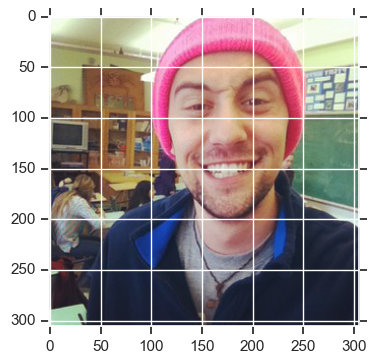

selfie quality 1:good 0:bad


KeyboardInterrupt: 

In [25]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
f=open("/Users/alexander/Documents/Inteligentes/proyecto final/Selfie-dataset/classif_4_caract.txt", "a+")
x_copia=x
x_copia.sort()
for photo in x_copia:
    plt.imshow(mpimg.imread(photo))
    plt.ion()
    plt.show()
    temp=photo[77:]
    print("selfie quality 1:good 0:bad")
    sq=input()
    print("only face:1 full body:0  upper:2")
    cu=input()
    print("none:0 b/w:1 vintage:2 sepia:3 Contrast:4 blur:5 weather:6 focus:7")
    flt=input()
    print("Brigness low:0 normal:1 high:2")
    brg=input()
    f.write("%s %s %s %s %s\n"%(temp,sq,cu,flt,brg))
    plt.close()
f.close()    